In [1]:
from env import *
from agent import *
from logger import *

In [2]:
use_cuda = torch.cuda.is_available()
print(f"Using CUDA: {use_cuda}")
print()

save_dir = Path("checkpoints") / datetime.datetime.now().strftime("%Y-%m-%dT%H-%M-%S")
save_dir.mkdir(parents=True)

env = Env.json_to_env(open("easymaps/0.map", "r").read())
agent = DQNAgent(env.state0.shape, 4, 10000, 32, 0.99, save_dir)

logger = MetricLogger(save_dir)

Using CUDA: True



In [3]:
env.state0.shape

(3, 7, 7)

In [4]:
agent.act(np.ones((3, 7, 7)))

1

In [5]:
state = env.reset()
state.shape

(3, 7, 7)

episode: 0, path length: 12
Episode 0 - Step 17432 - Epsilon 0.05 - Mean Reward 377.869 - Mean Length 25.71 - Mean Loss 3.102 - Mean Q Value 84.155 - Time Delta 51.871 - Time 2025-03-21T15:22:10
episode: 1, path length: 12
episode: 2, path length: 12
episode: 3, path length: 12
episode: 4, path length: 16
episode: 5, path length: 14
episode: 6, path length: 14
episode: 7, path length: 12
episode: 8, path length: 12
episode: 9, path length: 12
episode: 10, path length: 12
episode: 11, path length: 14
episode: 12, path length: 16
episode: 13, path length: 12
episode: 14, path length: 13
episode: 15, path length: 12
episode: 16, path length: 15
episode: 17, path length: 40
episode: 18, path length: 80
episode: 19, path length: 16
episode: 20, path length: 14
Episode 20 - Step 17792 - Epsilon 0.05 - Mean Reward 378.819 - Mean Length 23.87 - Mean Loss 2.835 - Mean Q Value 93.277 - Time Delta 2.051 - Time 2025-03-21T15:22:12
episode: 21, path length: 14
episode: 22, path length: 12
episode: 

KeyboardInterrupt: 

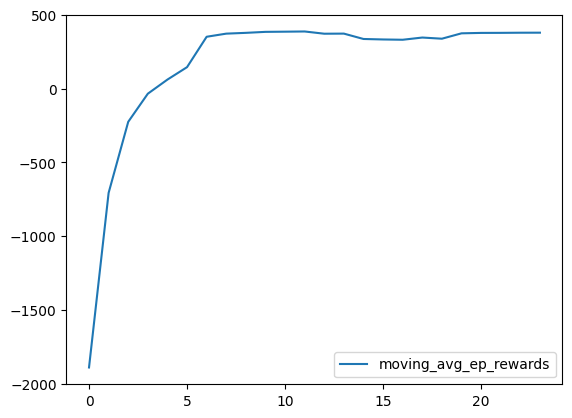

In [ ]:
episodes = 400
max_reward = -1e3
for e in range(episodes):
    state = env.reset()
    while True:
        action = agent.act(state)
        next_state, reward, done, trunc, info = env.step(action)
        if (reward > max_reward):
            agent.save()
            max_reward = reward
        agent.cache(state, next_state, action, reward, done)
        q, loss = agent.learn()
        logger.log_step(reward, loss, q)
        state = next_state
        if done:
            break
    print(f'episode: {e}, path length: {env.path_length}')
    logger.log_episode()
    if (e % 20 == 0) or (e == episodes - 1):
        logger.record(episode=e, epsilon=agent.epsilon, step=agent.curr_step)
